In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm 
import pickle 

In [3]:
_DATA_SET = "E:\sem10\computer vision\data set\CIFAR10"
_CATEGORIES = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

In [4]:
#to read csv file
csv_file = os.path.join(_DATA_SET,"trainLabels.csv")
import csv

with open(csv_file,'r') as file:
    reader = csv.reader(file)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        TRAIN_LABELS = {rows[0]:rows[1] for rows in reader}

print(TRAIN_LABELS)
        
      
        

{'id': 'label', '1': 'frog', '2': 'truck', '3': 'truck', '4': 'deer', '5': 'automobile', '6': 'automobile', '7': 'bird', '8': 'horse', '9': 'ship', '10': 'cat', '11': 'deer', '12': 'horse', '13': 'horse', '14': 'bird', '15': 'truck', '16': 'truck', '17': 'truck', '18': 'cat', '19': 'bird', '20': 'frog', '21': 'deer', '22': 'cat', '23': 'frog', '24': 'frog', '25': 'bird', '26': 'frog', '27': 'cat', '28': 'dog', '29': 'deer', '30': 'airplane', '31': 'airplane', '32': 'truck', '33': 'automobile', '34': 'cat', '35': 'deer', '36': 'airplane', '37': 'cat', '38': 'horse', '39': 'cat', '40': 'cat', '41': 'dog', '42': 'bird', '43': 'bird', '44': 'horse', '45': 'automobile', '46': 'automobile', '47': 'automobile', '48': 'bird', '49': 'bird', '50': 'airplane', '51': 'truck', '52': 'dog', '53': 'horse', '54': 'truck', '55': 'bird', '56': 'bird', '57': 'dog', '58': 'bird', '59': 'deer', '60': 'cat', '61': 'automobile', '62': 'automobile', '63': 'ship', '64': 'bird', '65': 'automobile', '66': 'autom

In [5]:
_TRAIN_IMGS=[]
IMG_SIZE = 100

path = os.path.join(_DATA_SET,"train")

for s in tqdm(TRAIN_LABELS):
    if(s=="id"):
        continue
    else:
        category = TRAIN_LABELS[s]
        img = s+".png"
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        _TRAIN_IMGS.append([img_resized,category])
       
        
    


100%|██████████████████████████████████████████████████████████████████████████| 50001/50001 [00:10<00:00, 4603.61it/s]


In [6]:
print(len(_TRAIN_IMGS))

50000


In [7]:
import random
random.shuffle(_TRAIN_IMGS)

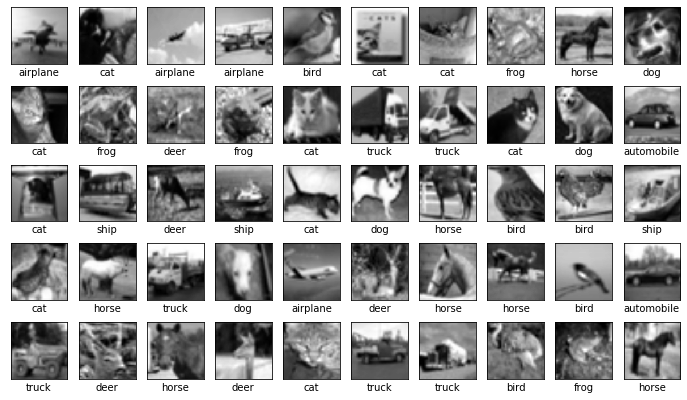

In [8]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(_TRAIN_IMGS[i][0], cmap=plt.cm.gray)
    plt.xlabel(_TRAIN_IMGS[i][1])
    
plt.show()  

In [135]:
fold=_TRAIN_IMGS[0:10000]
fold1=_TRAIN_IMGS[10000:20000]
fold2=_TRAIN_IMGS[20000:30000]
fold3=_TRAIN_IMGS[30000:40000]
fold4=_TRAIN_IMGS[40000:50000]

print(len(fold))
print(len(fold1))
print(len(fold2))
print(len(fold3))
print(len(fold4))

validation_set = fold4[:]
xtarin_set = fold+fold1+fold2+fold3
print(len(xtarin_set))



10000
10000
10000
10000
10000
40000


















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















0it [00:00, ?it/s]
















3884it [00:00, 38557.91it/s]
















7666it [00:00, 38248.55it/s]
















11458it [00:00, 38113.64it/s]
















15187it [00:00, 37781.30it/s]
















18999it [00:00, 37799.56it/s]
















22879it [00:00, 38012.56it/s]
















26719it [00:00, 38045.16it/s]
















30263it [00:00, 37197.70it/s]
















33766it [00:01, 27673.31it/s]
















36738it [00:01, 25036.77it/s]
















40000it [00:01, 30501.47it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.33it/s]
















 10%|████████▎                      

14768it [00:00, 37217.49it/s]
















18202it [00:00, 36221.05it/s]
















22033it [00:00, 36742.94it/s]
















25941it [00:00, 37338.84it/s]
















29880it [00:00, 37851.53it/s]
















33758it [00:00, 38043.41it/s]
















40000it [00:01, 37595.32it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.01it/s]
















 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:07<00:05,  1.31s/it]
















0it [00:00, ?it/s]
















3903it [00:00, 38751.02it/s]
















7487it [00:00, 37795.76it/s]
















10896it [00:00, 36516.02it/s]
















13926it [00:00, 34382.29it/s]
















17651it [00:00, 35182.27it/s]
















21396i

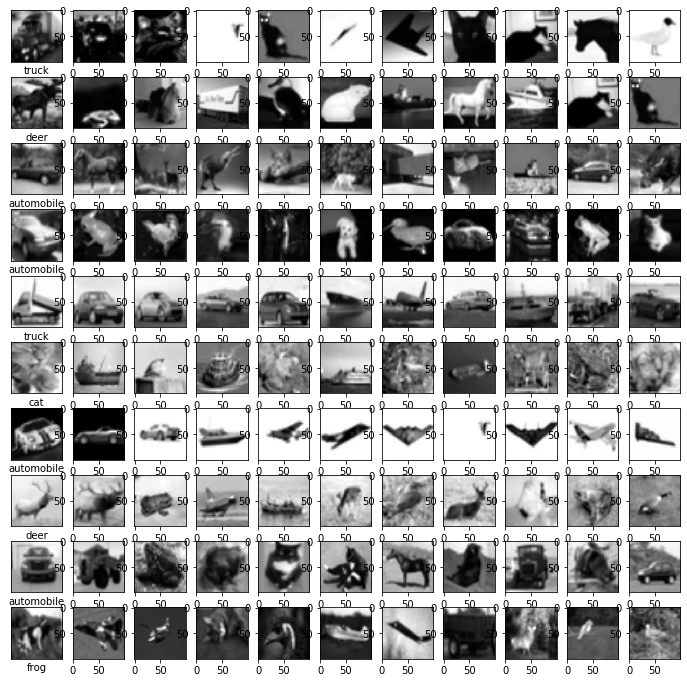

In [136]:
plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in tqdm(range(10)):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list =[]
    arr_dict = {}
    for j,k in tqdm(enumerate(xtarin_set)):
        dist_arr = np.abs(validation_set[i][0] - xtarin_set[j][0]) 
        dist = np.sum(dist_arr) 
        arr_list.append(dist)
        arr_dict[dist] = xtarin_set[j][0]
        
    
    k = 10
    min_index = nsmallest(k, arr_list)
   
    
    for m in tqdm(range(len(min_index))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict[min_index[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















0it [00:00, ?it/s]
















3776it [00:00, 37661.18it/s]
















7580it [00:00, 37691.99it/s]
















11233it [00:00, 37301.08it/s]
















14939it [00:00, 37146.63it/s]
















18681it [00:00, 37143.52it/s]
















22445it [00:00, 37219.04it/s]
















26168it [00:00, 37139.00it/s]
















29914it [00:00, 37154.19it/s]
















33723it [00:00, 37352.11it/s]
















40000it [00:01, 37411.01it/s]

















100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113.94it/s]
















 10%|████████▎                                                                          | 1/10 [00:01<00:10,  1.18s/it]
















0it [00:00, ?it/s]
















3858it [00:00, 38289.46it/s]
















78

26712it [00:00, 37664.23it/s]
















30499it [00:00, 37661.39it/s]
















34330it [00:00, 37771.84it/s]
















40000it [00:01, 37802.93it/s]

















100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 116.55it/s]
















 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:07<00:04,  1.19s/it]
















0it [00:00, ?it/s]
















3811it [00:00, 37825.24it/s]
















7559it [00:00, 37640.70it/s]
















11430it [00:00, 37873.76it/s]
















15361it [00:00, 38209.24it/s]
















19358it [00:00, 38641.69it/s]
















23196it [00:00, 38477.32it/s]
















26959it [00:00, 38134.83it/s]
















30704it [00:00, 37899.13it/s]
















34506it [00:00, 37900.16it/s]
















40000it [00:01, 37904.78it/s]

















100%|████████████████████████████████████████████

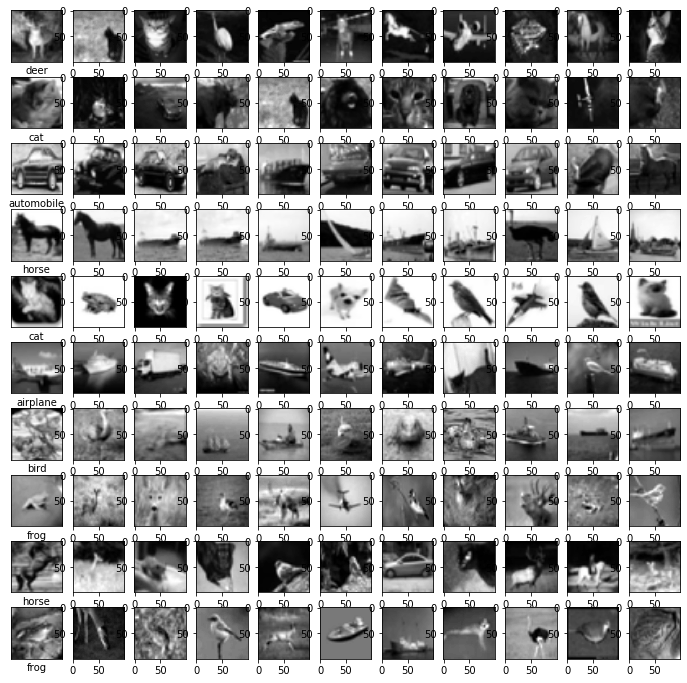

In [150]:
validation_set1 = fold1[:]
xtarin_set1 = fold+fold2+fold3+fold4

plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in tqdm(range(10)):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set1[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set1[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list1 =[]
    arr_dict1 = {}
    for j,k in tqdm(enumerate(xtarin_set1)):
        dist_arr1 = np.abs(validation_set1[i][0] - xtarin_set1[j][0]) 
        dist1 = np.sum(dist_arr1) 
        arr_list1.append(dist1)
        arr_dict1[dist1] = xtarin_set1[j][0]
        
    
    k = 10
    min_index1 = nsmallest(k, arr_list1)
   
    
    for m in tqdm(range(len(min_index1))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict1[min_index1[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















0it [00:00, ?it/s]
















3892it [00:00, 38632.48it/s]
















7541it [00:00, 37926.42it/s]
















10857it [00:00, 36261.12it/s]
















14437it [00:00, 36103.21it/s]
















18159it [00:00, 36353.91it/s]
















21774it [00:00, 36215.61it/s]
















25615it [00:00, 36769.87it/s]
















29333it [00:00, 36809.21it/s]
















33152it [00:00, 37135.55it/s]
















40000it [00:01, 36724.35it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 38.27it/s]
















 10%|████████▎                                                                    

26376it [00:00, 37652.64it/s]
















30200it [00:00, 37745.00it/s]
















34040it [00:00, 37853.92it/s]
















40000it [00:01, 37643.43it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 66.84it/s]
















 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:07<00:04,  1.23s/it]
















0it [00:00, ?it/s]
















3862it [00:00, 38340.59it/s]
















7695it [00:00, 38250.27it/s]
















11475it [00:00, 38089.49it/s]
















15202it [00:00, 37755.86it/s]
















19025it [00:00, 37807.53it/s]
















22715it [00:00, 37447.13it/s]
















26142it [00:00, 36348.91it/s]
















29722it [00:00, 36153.77it/s]
















33390i

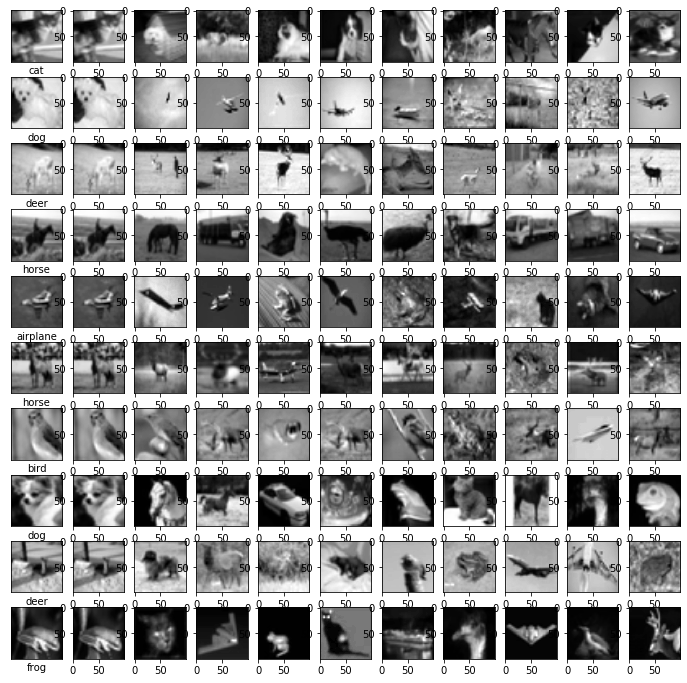

In [153]:
validation_set2 = fold2[:]
xtarin_set2 = fold+fold2+fold3+fold4

plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in tqdm(range(10)):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set2[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set2[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list2 =[]
    arr_dict2 = {}
    for j,k in tqdm(enumerate(xtarin_set2)):
        dist_arr2 = np.abs(validation_set2[i][0] - xtarin_set2[j][0]) 
        dist2 = np.sum(dist_arr2) 
        arr_list2.append(dist2)
        arr_dict2[dist2] = xtarin_set2[j][0]
        
    
    k = 10
    min_index2 = nsmallest(k, arr_list2)
   
    
    for m in tqdm(range(len(min_index2))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict2[min_index2[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















0it [00:00, ?it/s]
















3945it [00:00, 39164.87it/s]
















7693it [00:00, 38556.74it/s]
















11364it [00:00, 37897.60it/s]
















15167it [00:00, 37849.47it/s]
















18883it [00:00, 37626.99it/s]
















22604it [00:00, 37401.76it/s]
















26530it [00:00, 37857.32it/s]
















30462it [00:00, 38203.49it/s]
















34367it [00:00, 38373.44it/s]
















40000it [00:01, 37674.39it/s]

















100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113.93it/s]
















 10%|████████▎                                                                          | 1/10 [00:01<00:10,  1.17s/it]
















0it [00:00, ?it/s]
















3897it [00:00, 38683.21it/s]
















78

26733it [00:00, 38157.16it/s]
















30618it [00:00, 38276.66it/s]
















34474it [00:00, 38280.66it/s]
















40000it [00:01, 38175.60it/s]

















100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 108.98it/s]
















 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:07<00:04,  1.20s/it]
















0it [00:00, ?it/s]
















3983it [00:00, 39530.24it/s]
















7782it [00:00, 38967.14it/s]
















11359it [00:00, 37864.98it/s]
















14942it [00:00, 37142.90it/s]
















18757it [00:00, 37358.93it/s]
















22527it [00:00, 37382.40it/s]
















26338it [00:00, 37516.59it/s]
















30032it [00:00, 37256.83it/s]
















33879it [00:00, 37533.62it/s]
















40000it [00:01, 37239.50it/s]

















100%|████████████████████████████████████████████

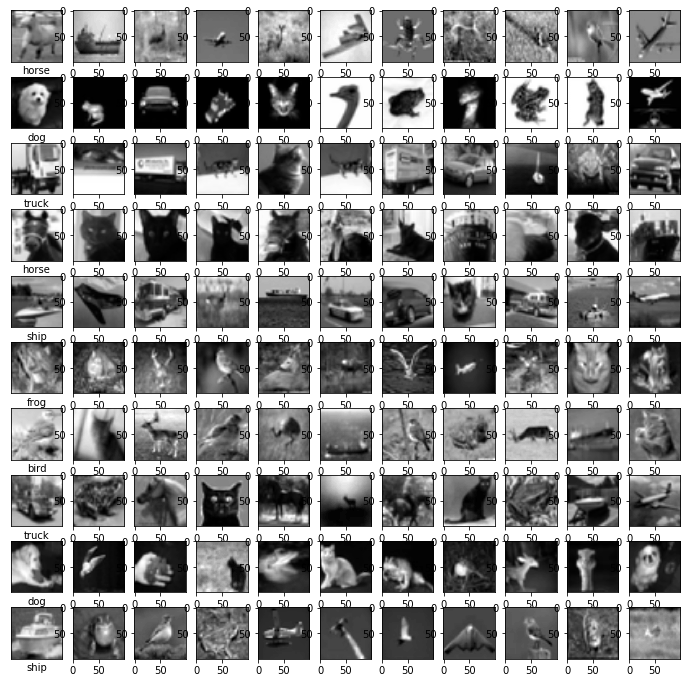

In [156]:
validation_set3 = fold3[:]
xtarin_set3 = fold+fold1+fold2+fold4

plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in tqdm(range(10)):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set3[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set3[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list3 =[]
    arr_dict3 = {}
    for j,k in tqdm(enumerate(xtarin_set3)):
        dist_arr3 = np.abs(validation_set3[i][0] - xtarin_set3[j][0]) 
        dist3 = np.sum(dist_arr3) 
        arr_list3.append(dist3)
        arr_dict3[dist3] = xtarin_set3[j][0]
        
    
    k = 10
    min_index3 = nsmallest(k, arr_list3)
   
    
    for m in tqdm(range(len(min_index3))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict3[min_index3[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















0it [00:00, ?it/s]
















3690it [00:00, 36770.99it/s]
















7227it [00:00, 36257.71it/s]
















10830it [00:00, 36109.85it/s]
















14462it [00:00, 36106.14it/s]
















18221it [00:00, 36461.09it/s]
















22074it [00:00, 36978.41it/s]
















25768it [00:00, 36887.89it/s]
















29381it [00:00, 36574.27it/s]
















33137it [00:00, 36786.79it/s]
















40000it [00:01, 36811.13it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.59it/s]
















 10%|████████▎                                                                    

26829it [00:00, 38346.89it/s]
















30683it [00:00, 38320.70it/s]
















34627it [00:00, 38566.70it/s]
















40000it [00:01, 38123.03it/s]

















  0%|                                                                                           | 0/10 [00:00<?, ?it/s]
















100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 67.29it/s]
















 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:07<00:04,  1.23s/it]
















0it [00:00, ?it/s]
















3796it [00:00, 37684.83it/s]
















7418it [00:00, 37215.40it/s]
















11338it [00:00, 37709.77it/s]
















15191it [00:00, 37867.32it/s]
















19161it [00:00, 38362.15it/s]
















22875it [00:00, 37902.25it/s]
















26766it [00:00, 38114.81it/s]
















30644it [00:00, 38231.49it/s]
















34544i

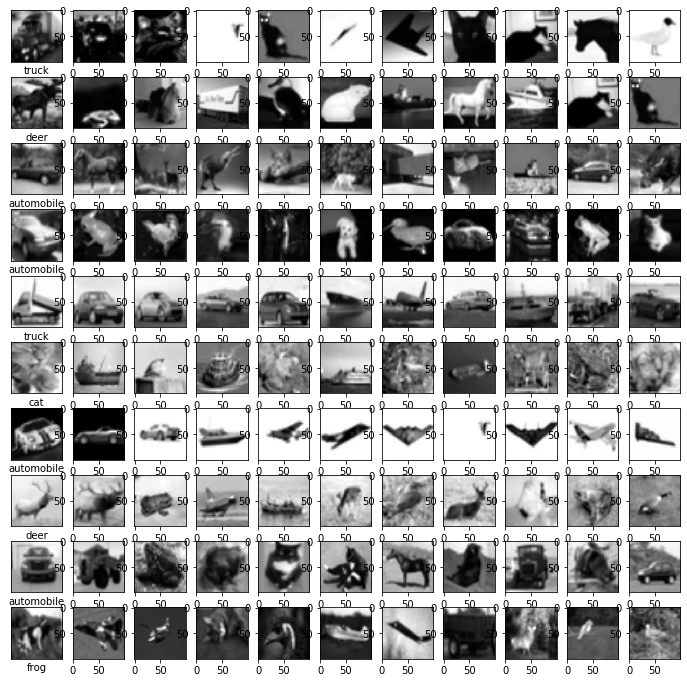

In [157]:
validation_set4 = fold4[:]
xtarin_set4 = fold+fold1+fold2+fold3

plt.figure(figsize=(12,12))
tmpIndex = 1
n=1
for i in tqdm(range(10)):
    
    plt.subplot(10, 11, tmpIndex)
    plt.imshow(validation_set4[i][0], cmap=plt.cm.gray)
    plt.xlabel(validation_set4[i][1])
    plt.xticks([])
    plt.yticks([])
    
    arr_list4 =[]
    arr_dict4 = {}
    for j,k in tqdm(enumerate(xtarin_set4)):
        dist_arr4 = np.abs(validation_set4[i][0] - xtarin_set4[j][0]) 
        dist4 = np.sum(dist_arr4) 
        arr_list4.append(dist4)
        arr_dict4[dist4] = xtarin_set4[j][0]
        
    
    k = 10
    min_index4 = nsmallest(k, arr_list4)
   
    
    for m in tqdm(range(len(min_index4))):
        plt.subplot(10, 11, n+1)
        plt.imshow(arr_dict4[min_index4[m]], cmap=plt.cm.gray)
        n=n+1
    tmpIndex += 11
    n=n+1
    

plt.show()